# Projeto FInal

## Alunos

- Daniel Moraes (dmms@cesar.school)
- Marlos Ribeiro (mgrb@cesar.school)
- Adonis Dário Pires Gomes de Morais (adpgm@cesar.school)

## Importação de Dependências

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, random_split
from os.path import exists

import kagglehub
import os

## Download de Dataset

In [2]:
# Obter o diretório atual
current_directory = os.getcwd()

# URL do arquivo a ser baixado
url = "https://www.kaggle.com/api/v1/datasets/download/muratkokludataset/date-fruit-datasets"

# Comando curl com destino dinâmico
!curl -L --output "{current_directory}"/archive.zip "{url}"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  408k  100  408k    0     0   310k      0  0:00:01  0:00:01 --:--:-- 1203k


In [3]:
!unzip -q -o "{current_directory}"/archive.zip -d "{current_directory}"

In [4]:
!ls "{current_directory}"/Date_Fruit_Datasets

Date_Fruit_Datasets.arff		  Date_Fruit_Datasets.xlsx
Date_Fruit_Datasets_Citation_Request.txt


In [5]:
df_fruits = pd.read_excel(f'{current_directory}/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx', sheet_name='Date_Fruit_Datasets')
df_fruits.head(10)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
5,408953,2326.6931,840.1821,622.0076,0.6722,721.5921,0.9974,410036,0.7805,1.3508,...,3.6309,6.0285,6.2159,-41140371456,-33146710016,-27907301376,49.7001,45.3190,39.7371,BERHI
6,451414,2457.2080,889.3253,652.4316,0.6796,758.1281,0.9970,452755,0.7877,1.3631,...,3.0703,3.4163,4.9168,-63711666176,-64060743680,-52603465728,57.8060,58.5449,52.4199,BERHI
7,382636,2275.7791,808.0833,609.2819,0.6569,697.9880,0.9931,385277,0.7032,1.3263,...,3.6756,7.0258,5.3254,-29873577984,-33570080768,-33054025728,45.1768,48.2407,47.2167,BERHI
8,546063,2714.9480,916.3737,766.4536,0.5481,833.8279,0.9882,552598,0.7710,1.1956,...,3.4640,3.7416,4.8120,-95262416896,-79321833472,-69569445888,64.6188,59.9127,55.6509,BERHI
9,420044,2391.1230,836.9280,645.1822,0.6370,731.3116,0.9918,423531,0.7853,1.2972,...,3.3729,4.2898,5.4637,-74341122048,-58172182528,-42640556032,64.9094,58.2771,48.4820,BERHI


## Exploração do Dataset

### Shape

In [6]:
print(f'dataset shape: {df_fruits.shape}')

dataset shape: (898, 35)


### Info

In [7]:
print(f'dataset info: {df_fruits.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

### Quantidade de Nulls

In [8]:
print(f'Quantidade de Nulls: {df_fruits.isnull().sum()}')

Quantidade de Nulls: AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64


### Registros Duplicados

In [9]:
print(f'Registros Duplicados: {df_fruits.duplicated().sum()}')

Registros Duplicados: 0


### Label Encoder

In [10]:
label_encoder_class = preprocessing.LabelEncoder()
df_fruits['Class'] = label_encoder_class.fit_transform(df_fruits['Class'])
df_fruits.head(10)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,0
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,0
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,0
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,0
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,0
5,408953,2326.6931,840.1821,622.0076,0.6722,721.5921,0.9974,410036,0.7805,1.3508,...,3.6309,6.0285,6.2159,-41140371456,-33146710016,-27907301376,49.7001,45.3190,39.7371,0
6,451414,2457.2080,889.3253,652.4316,0.6796,758.1281,0.9970,452755,0.7877,1.3631,...,3.0703,3.4163,4.9168,-63711666176,-64060743680,-52603465728,57.8060,58.5449,52.4199,0
7,382636,2275.7791,808.0833,609.2819,0.6569,697.9880,0.9931,385277,0.7032,1.3263,...,3.6756,7.0258,5.3254,-29873577984,-33570080768,-33054025728,45.1768,48.2407,47.2167,0
8,546063,2714.9480,916.3737,766.4536,0.5481,833.8279,0.9882,552598,0.7710,1.1956,...,3.4640,3.7416,4.8120,-95262416896,-79321833472,-69569445888,64.6188,59.9127,55.6509,0
9,420044,2391.1230,836.9280,645.1822,0.6370,731.3116,0.9918,423531,0.7853,1.2972,...,3.3729,4.2898,5.4637,-74341122048,-58172182528,-42640556032,64.9094,58.2771,48.4820,0


In [11]:
print(f"Category in Class is : {df_fruits['Class'].unique()}")
print(f"Number of categories in Y: {len(df_fruits['Class'].unique())}")

Category in Class is : [0 1 2 3 4 5 6]
Number of categories in Y: 7


### Normalização dos Dados

#### Separação do X e Y

In [12]:
y_df = df_fruits['Class']
x_df = df_fruits[df_fruits.columns.difference(['Class'])]
x_df.shape

(898, 34)

In [13]:
scaler = preprocessing.StandardScaler()
df = pd.DataFrame(scaler.fit_transform(x_df), columns=x_df.columns)
df.head(10)

,ALLdaub4RB,ALLdaub4RG,ALLdaub4RR,AREA,ASPECT_RATIO,COMPACTNESS,CONVEX_AREA,ECCENTRICITY,EQDIASQ,EXTENT,...,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,SOLIDITY,SkewRB,SkewRG,SkewRR,StdDevRB,StdDevRG,StdDevRR
0,-0.023908,0.435593,0.538340,1.155640,-0.046797,1.091228,1.108752,-1.129568,1.075704,0.871873,...,-0.688443,1.169934,0.240467,0.708628,0.555487,-0.553810,-0.695157,0.810769,-0.607179,-0.401724
1,-0.024694,0.284113,-0.003550,0.371700,-0.051373,1.598142,0.323373,-1.899771,0.431437,0.804852,...,0.013019,1.765084,0.519036,0.857410,0.257494,-0.413034,-0.341620,0.402781,-0.529053,-0.282678
2,0.355243,0.742335,0.958897,2.132265,-0.045820,1.020421,2.069149,-0.993119,1.794103,0.547942,...,-0.922263,1.088247,0.396857,0.791285,1.055673,-0.644743,-0.853310,1.582297,-0.322719,0.104097
3,-0.639369,-0.331475,-0.416894,1.098729,-0.047612,1.157207,1.051992,-1.250230,1.031228,0.737832,...,-0.454622,1.244196,0.137837,0.714138,2.453948,0.700094,0.391546,0.866354,-0.346734,-0.050550
4,-0.502579,0.148910,0.167646,0.459641,-0.046056,1.022030,0.431717,-1.025822,0.507425,0.384115,...,-0.220802,1.090369,0.250242,0.493720,1.005402,-0.340673,-0.471452,0.209241,-0.248073,0.201964
5,-0.773632,-0.246966,-0.023844,1.032395,-0.043810,0.832139,0.976418,-0.736009,0.978975,0.823469,...,-0.688443,0.871829,0.377308,0.857410,2.065529,0.361671,0.031433,1.356365,-0.428945,-0.125430
6,0.399849,0.689842,0.481066,1.428541,-0.043120,0.729147,1.369218,-0.652561,1.284645,0.957509,...,-0.922263,0.756194,0.093852,0.835369,1.094878,-0.106943,-0.030407,1.569916,0.661597,0.732422
7,-0.081579,-0.040018,-0.305596,0.786868,-0.045186,0.910992,0.748760,-0.908544,0.781496,-0.615601,...,-0.454622,0.962003,0.040093,0.620461,1.173606,0.366771,-0.448116,-1.096359,-2.131233,-1.514057
8,0.698799,0.786725,0.905429,2.311580,-0.052524,1.652856,2.287272,-2.135455,1.917972,0.646611,...,-0.922263,1.830859,0.059642,0.350448,0.102570,-0.773203,-0.894784,0.636750,-0.250455,0.301783
9,0.035493,0.670873,0.923530,1.135870,-0.046820,1.071917,1.100504,-1.132951,1.060291,0.912829,...,-0.688443,1.146595,0.088965,0.548825,1.487091,-0.206535,-0.441964,1.891700,0.134516,0.475546


## Separação de X e Y

### Y

In [14]:
y = y_df
y.shape

(898,)

In [15]:
y = y.values.reshape(-1, 1)
y.shape

(898, 1)

In [16]:
y = (y.transpose())[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### X

In [17]:
x = x_df
x.shape

(898, 34)

## Criação do Dataset

In [18]:
class CustomDataset(Dataset):
  def __init__(self, x, y):
    super(CustomDataset, self).__init__()
    self.x = torch.Tensor(x)
    self.y = torch.LongTensor(y)

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return len(self.x)

## Instanciação do Dataset

In [19]:
dataset = CustomDataset(x.to_numpy(), y)

## Separação Treino / Teste

In [20]:
dataset_train, dataset_test = random_split(dataset, [0.8, 0.2])

### Tamanho Dataset Treino

In [21]:
print(f'Tamanho Dataset Treino: {len(dataset_train)}')

Tamanho Dataset Treino: 719


### Tamanho Dataset Test

In [22]:
print(f'Tamanho Dataset Teste: {len(dataset_test)}')

Tamanho Dataset Teste: 179


## Dataloader

In [23]:
use_cuda = torch.cuda.is_available()

torch.manual_seed(111)

device = torch.device("cuda" if use_cuda else "cpu")
print(f'device: {device}')

train_kwargs = {'batch_size': 50}
test_kwargs = {'batch_size': 50}
if use_cuda:
    cuda_kwargs = {'num_workers': 1,
                    'pin_memory': True,
                    'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

train_loader = torch.utils.data.DataLoader(dataset_train,**train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset_test, **test_kwargs)

device: cuda


## Criação da Rede

In [24]:
input_size = 34 # TODO: validar o tamanho
output_size = 7 # número de features da coluna Class

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 3000),
            nn.ReLU(),
            nn.Linear(3000, 3000),
            nn.ReLU(),
            nn.Linear(3000, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, output_size)
        )

    def forward(self, x):
        x = self.fc(x)
        output = F.log_softmax(x, dim=0)
        return output


model = Net()

In [25]:
model

Net(
  (fc): Sequential(
    (0): Linear(in_features=34, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=1024, bias=True)
    (5): ReLU()
    (6): Linear(in_features=1024, out_features=3000, bias=True)
    (7): ReLU()
    (8): Linear(in_features=3000, out_features=3000, bias=True)
    (9): ReLU()
    (10): Linear(in_features=3000, out_features=1024, bias=True)
    (11): ReLU()
    (12): Linear(in_features=1024, out_features=512, bias=True)
    (13): ReLU()
    (14): Linear(in_features=512, out_features=128, bias=True)
    (15): ReLU()
    (16): Linear(in_features=128, out_features=7, bias=True)
  )
)

## Predict

### Treinamento

In [26]:
dataset_train[5][0]

tensor([ 4.1263e+01,  5.0260e+01,  5.3697e+01,  3.4045e+05,  1.2067e+00,
         9.0890e-01,  3.4144e+05,  5.5970e-01,  6.5839e+02,  7.8130e-01,
        -2.4675e+10, -3.4644e+10, -4.0366e+10,  4.2934e+00,  2.7434e+00,
         2.4762e+00,  7.2441e+02,  6.0033e+02,  8.2521e+01,  1.0052e+02,
         1.0740e+02,  2.0982e+03,  9.7180e-01,  2.1000e-03,  1.8000e-03,
         8.2600e-01,  9.9680e-01,  9.9710e-01,  1.1704e+00,  4.7350e-01,
        -1.7210e-01,  3.2049e+01,  2.6465e+01,  2.9497e+01])

In [27]:
model(dataset_train[5][0])

tensor([ -6760961.0000,         0.0000,  -5433531.0000,  -2898735.0000,
         -2787672.5000,  -4310282.0000, -11666535.0000],
       grad_fn=<LogSoftmaxBackward0>)

### Criando Objeto de Treinamento

In [28]:
def train(log_interval, dry_run, model, device, train_loader, optimizer, epoch, criterion):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data),
                len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss))
            if dry_run:
                break

In [29]:
def test(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    acc = 100. * correct / len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss,
        correct,
        len(test_loader.dataset),
        acc))
    return acc, test_loss


## Avaliação

In [30]:
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001) ## Testar outros como Adam tbm
criterion = torch.nn.CrossEntropyLoss()

test_losses = []
test_acc = []
epochs = 50
best_epoch = 0
best_acc, best_loss = test(model, device, test_loader, criterion)
for epoch in range(1, epochs + 1):
    train(10, False, model, device, train_loader, optimizer, epoch, criterion)
    acc, test_loss = test(model, device, test_loader, criterion)
    test_losses.append(test_loss)
    test_acc.append(acc)
    if acc > best_acc:
      best_acc = acc
      best_epoch = epoch + 1
      print('saving...')
      torch.save(model.state_dict(), "fruits_nn.pt")


Test set: Average loss: 83616.5419, Accuracy: 11/179 (6%)

Train Epoch: 1 [0/719 (0%)]	Loss: 3497267.750000
Train Epoch: 1 [500/719 (67%)]	Loss: 1106434.500000

Test set: Average loss: 17431.5597, Accuracy: 65/179 (36%)

saving...
Train Epoch: 2 [0/719 (0%)]	Loss: 522778.437500
Train Epoch: 2 [500/719 (67%)]	Loss: 272965.281250

Test set: Average loss: 1772.5362, Accuracy: 64/179 (36%)

Train Epoch: 3 [0/719 (0%)]	Loss: 115385.796875
Train Epoch: 3 [500/719 (67%)]	Loss: 66233.273438

Test set: Average loss: 1719.5733, Accuracy: 33/179 (18%)

Train Epoch: 4 [0/719 (0%)]	Loss: 85583.343750
Train Epoch: 4 [500/719 (67%)]	Loss: 27362.289062

Test set: Average loss: 808.5771, Accuracy: 63/179 (35%)

Train Epoch: 5 [0/719 (0%)]	Loss: 32352.679688
Train Epoch: 5 [500/719 (67%)]	Loss: 7798.569824

Test set: Average loss: 501.5772, Accuracy: 19/179 (11%)

Train Epoch: 6 [0/719 (0%)]	Loss: 21601.636719
Train Epoch: 6 [500/719 (67%)]	Loss: 7495.298340

Test set: Average loss: 197.1934, Accuracy:

In [31]:
print(f"Best Accuracy @ Epoch {best_epoch}: {best_acc:.2f}%")

Best Accuracy @ Epoch 27: 68.16%


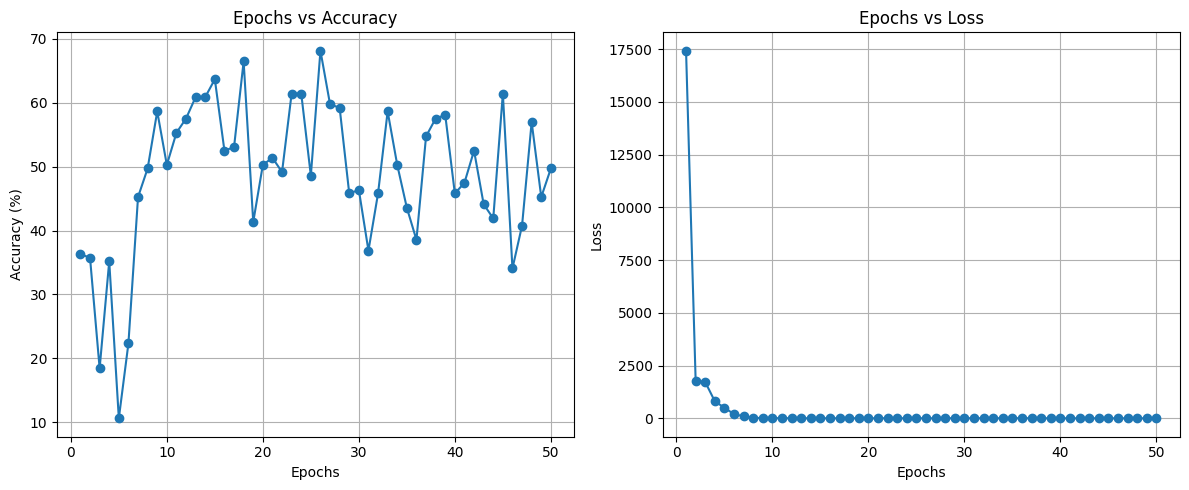

In [32]:
# prompt: plot a graph of epochs vs acc and epochs vc losses

import matplotlib.pyplot as plt

# Assuming test_acc and test_losses are defined from the previous code
epochs = range(1, len(test_acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, test_acc, marker='o', linestyle='-')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, test_losses, marker='o', linestyle='-')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

In [33]:
aux = torch.load("fruits_nn.pt")
aux

/tmp/ipykernel_84779/3911061226.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  aux = torch.load("fruits_nn.pt")


OrderedDict([('fc.0.weight',
              tensor([[ 0.1230, -0.0728,  0.0923,  ...,  0.0467,  0.0501, -0.0648],
                      [ 0.1338, -0.1671,  0.0275,  ..., -0.0198,  0.0382, -0.0902],
                      [-0.1028, -0.1346,  0.0891,  ..., -0.0488,  0.0291,  0.0381],
                      ...,
                      [ 0.1506,  0.1489, -0.0832,  ..., -0.0525,  0.0336,  0.1513],
                      [-0.0140,  0.0887, -0.1695,  ...,  0.0113,  0.1595,  0.0574],
                      [-0.0570,  0.1570, -0.1568,  ..., -0.0569, -0.1439, -0.0586]],
                     device='cuda:0')),
             ('fc.0.bias',
              tensor([ 0.0469, -0.0551,  0.1276, -0.0028, -0.0161,  0.1102,  0.0842, -0.1020,
                       0.1239,  0.1382,  0.0123, -0.1531,  0.1228,  0.0949,  0.0095, -0.0663,
                      -0.0383,  0.0848, -0.1466, -0.1250,  0.1613,  0.0585, -0.1512,  0.1619,
                      -0.0341,  0.0365, -0.0866,  0.0800, -0.0611, -0.0138,  0.1118,  0.04

In [34]:
model.load_state_dict(aux)

<All keys matched successfully>

## Conclusão

Foram realizados testes com diversos layouts de redes, e utilizando as seguintes épocas:

- 8
- 15
- 20
- 25
- 30
- 40
- 100

Percebemos que ao executar com até 40 épocas, conseguimos alcançar um bom valor de perda, porém apenas com 100 épocas, conseguimos atingir um valor ótimo do MSE, onde:


**Melhor Época**: 91


**Melhor Acurácia**: 18.95910780669145

Além disso, foi observado que os erros a cada época tiveram um comportamento de cela descentente, variando a cada iteração.